<h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #FCFFE7; text-align: center; line-height: 0.75;background-color: #000000"><b>Unsupervised Learning : Cellphone Product Analysis</b></h1>

<h3 style="text-align: center"><b>About Data</b></h1>

This dataset contains varies widely depending on its specifications of 3000 phone for both hardware and software. In this notebook, we will explore clustering based on the same character and give label on every cluster.

**Problem Statement**:
1. What is insight from each dataset (map visualization gets additional value).
2. How is the result of silhouette metrics from the model used by score?
3. How is the comparison of each model?

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Import Package</div></center>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Data Understanding</div></center>

In [2]:
df= pd.read_csv('cellphone_price.csv')

In [3]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0             0     1  
1        1             1     0  
2        1             1     0  
3        1             0     0  
4        1             1     0

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [5]:
df.describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean     1241.849000     0.502000     1.528467     0.512000     4.404000   
std       437.063804     0.500079     0.820358     0.499939     4.383742   
min       500.000000     0.000000     0.500000     0.000000     0.000000   
25%       863.750000     0.000000     0.700000     0.000000     1.000000   
50%      1232.000000     1.000000     1.500000     1.000000     3.000000   
75%      1619.000000     1.000000     2.300000     1.000000     7.000000   
max      1999.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.510000    32.581667     0.507000   140.003000     4.456333   
std       0.499983    18.152810     0.285969    35.213809     2.289361   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     2.000000   
50%       1.000000    33.000000     0.500000   140.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     6.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      9.962333   639.112333  1247.601667  2129.141333    12.202667   
std       6.073923   440.202998   434.666168  1085.694231     4.251151   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   277.750000   865.000000  1212.750000     9.000000   
50%      10.000000   564.000000  1248.000000  2147.500000    12.000000   
75%      15.000000   932.500000  1634.000000  3065.250000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  3000.000000  3000.000000  3000.000000   3000.000000  3000.000000  
mean      5.616667    11.035667     0.759667      0.502000     0.507000  
std       4.322494     5.474400     0.427357      0.500079     0.500034  
min       0.000000     2.000000     0.000000      0.000000     0.000000  
25%       2.000000     6.000000     1.000000      0.000000     0.000000  
50%       5.000000    11.000000     1.000000      1.000000     1.000000  
75%       9.000000    16.000000     1.000000      1.000000     1.000000  
max      18.000000    20.000000     1.000000      1.000000     1.000000

In [6]:
def grab_col_names(dataframe,cat_th=10,car_th=30):
  
    # cat_cols , cat_but_car
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ['category','object','bool']]
    num_but_cat = [col for col in df.columns if df[col].nunique() <10 and (df[col].dtypes) in ['int64','float64']]
    cat_but_car = [col for col in df.columns if 
                   df[col].nunique()>20 and str(df[col].dtypes) in ['category','object']]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    #let's pull numeric variables
    num_cols = [col for col in df.columns if df[col].dtypes in ['int','float']]
    num_cols = [col for col in num_cols if col not in cat_cols]
    
    #Reporting section
    print(f'Observations : {dataframe.shape[0]}')
    print(f'Variables :{dataframe.shape[1]}')
    print(f'cat_cols : {len(cat_cols)}')
    print(f'num_cols : {len(num_cols)}')
    print(f'cat_but_car : {len(cat_but_car)}')
    print(f'num_but_cat : {len(num_but_cat)}')
    
    return cat_cols ,num_cols ,cat_but_car

In [7]:
grab_col_names(df)

Observations : 3000
Variables :20
cat_cols : 7
num_cols : 2
cat_but_car : 0
num_but_cat : 7


(['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'],
 ['clock_speed', 'm_dep'],
 [])

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

In [8]:
y= df.copy()
low= y[(y['battery_power']>= 500)& (y['battery_power']<=1000)]
low['bat_cap']= 'low battery'
mid=y[(y['battery_power']> 1000) & (y['battery_power']<=1500)]
mid['bat_cap']= 'mid battery'
high= y[(y['battery_power']> 1500) & (y['battery_power']<=2000)]
high['bat_cap']='high battery'

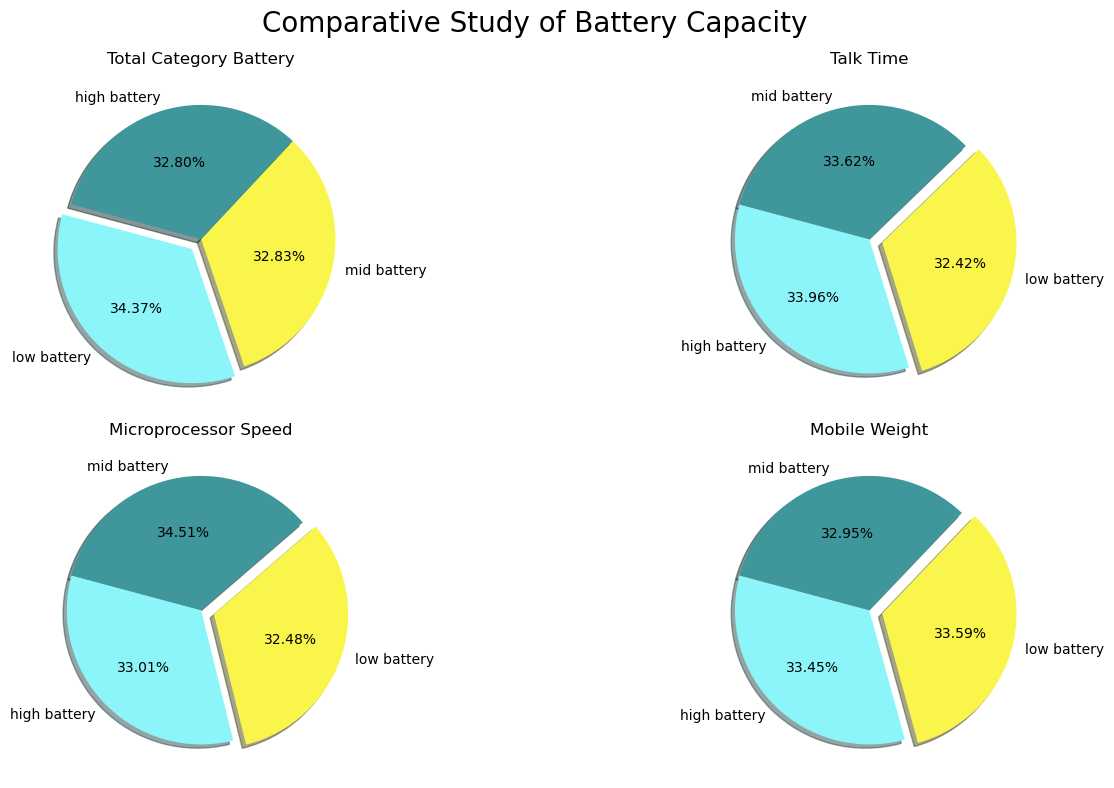

In [9]:
capacity= pd.concat([low, mid, high])
talk= capacity.groupby('bat_cap')['talk_time'].mean()
sp= capacity.groupby('bat_cap')['clock_speed'].mean()
weight= capacity.groupby('bat_cap')['mobile_wt'].mean()

fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2, figsize=(15,8))
plt.suptitle('Comparative Study of Battery Capacity', fontsize=20)


capacity['bat_cap'].value_counts().plot(shadow= True,explode=[0.1, 0, 0], 
                                       ax=ax1, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#8BF5FA','#F9F54B','#3F979B'])
talk.plot(shadow= True,explode=[0, 0.1, 0], 
                                       ax=ax2, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#8BF5FA','#F9F54B','#3F979B'])
sp.plot(shadow= True,explode=[0, 0.1,0], 
                                       ax= ax3, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#8BF5FA','#F9F54B','#3F979B'])
weight.plot(shadow= True,explode=[0, 0.1, 0], 
                                       ax= ax4, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#8BF5FA','#F9F54B','#3F979B'])
ax1.axis( 'off')
ax2.axis( 'off')
ax3.axis( 'off')
ax4.axis( 'off')
ax1.set_title('Total Category Battery')
ax2.set_title('Talk Time')
ax3.set_title('Microprocessor Speed')
ax4.set_title('Mobile Weight')
plt.tight_layout()
plt.show()


**Insights:**
1. There are more categories of low battery. Companies produce more because of consumer needs.
2. The battery capacity category has a talk time that is directly proportional to its capacity.
3. Cellphones with low battery capacity tend to have low microprocessors as well, in contrast to those with mid-range battery capacity, which rank highest, so that people in this category are still in demand (the Decoy effect).
4. However, a low battery capacity has a higher battery weight; this could happen because the company wants to sell this product at a low price based on the existing market segment.

In [10]:
x= df.copy()
low= x[x['ram']<= 1500]
low['cat_ram']= 'low memory'
mid=x[(x['ram']> 1500) & (x['ram']<=2500)]
mid['cat_ram']= 'mid memory'
high= x[(x['ram']> 2500) & (x['ram']<=4000)]
high['cat_ram']='high memory'

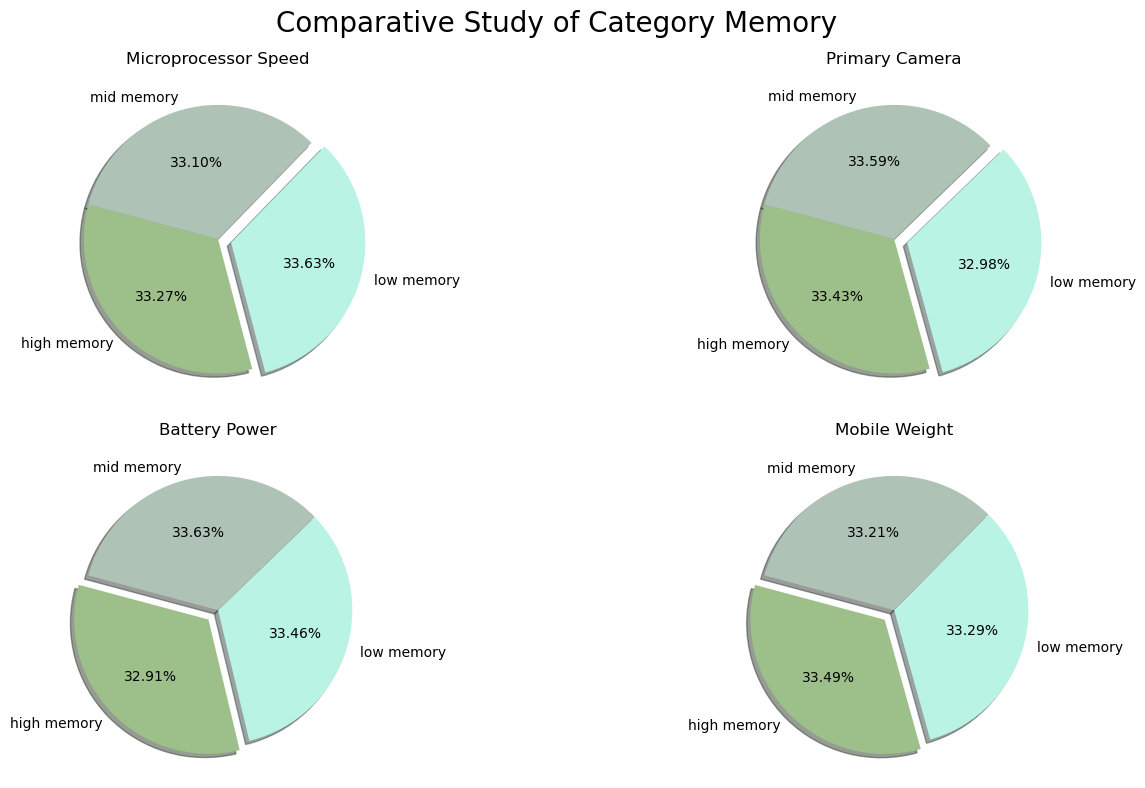

In [11]:
memory= pd.concat([low,mid,high])
speed= memory.groupby('cat_ram')['clock_speed'].mean()
pc= memory.groupby('cat_ram')['pc'].mean()
battery= memory.groupby('cat_ram')['battery_power'].mean()
weight= memory.groupby('cat_ram')['mobile_wt'].mean()

fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2, figsize=(15,8))
plt.suptitle('Comparative Study of Category Memory', fontsize=20)

speed.plot(shadow= True,explode=[0, 0.1, 0], 
                                       ax= ax1, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#9DC08B','#B9F3E4','#AEC2B6'])


pc.plot(shadow= True,explode=[0, 0.1, 0], 
                                       ax= ax2, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#9DC08B','#B9F3E4','#AEC2B6'])
battery.plot(shadow= True,explode=[0.1, 0, 0], 
                                       ax= ax3, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#9DC08B','#B9F3E4','#AEC2B6'])
weight.plot(shadow= True,explode=[0.1, 0, 0], 
                                       ax= ax4, kind= 'pie', autopct='%.2f%%', 
                                       textprops={'fontsize':10}, startangle=165, 
                                       colors=['#9DC08B','#B9F3E4','#AEC2B6'])
ax1.axis( 'off')
ax2.axis( 'off')
ax3.axis( 'off')
ax4.axis( 'off')
ax1.set_title('Microprocessor Speed')
ax2.set_title('Primary Camera')
ax3.set_title('Battery Power')
ax4.set_title('Mobile Weight')
plt.tight_layout()
plt.show()

**Insights:**
1. Some cellphones with low memory have a higher average processor with a lower primary camera. This could happen because the company wants to produce good-quality products that are still affordable. so some features are trimmed.
2. Cellphones with high RAM have low battery capacity and a high product weight. So it can be concluded that companies are trying to maximize the Goldilocks effect, where consumers are forced to choose according to their needs, for example, RAM.

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Data Scaling: Standardization</div></center>

In [12]:
x= df.copy()
scaler = StandardScaler()
scale_std = scaler.fit_transform(x)
df_scl = pd.DataFrame(scaler.fit_transform(x), columns=df.columns)

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">PCA</div></center>

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(scale_std))
pca.explained_variance_

array([1.65871231, 1.60472682, 1.56308397, 1.46466351, 1.11034675,
       1.07065043, 1.06096538, 1.02075561, 1.01750208, 1.00003277,
       0.99769615, 0.97986275, 0.9633217 , 0.93970487, 0.90619729,
       0.90154325, 0.49835277, 0.47651379, 0.42335849, 0.34867818])

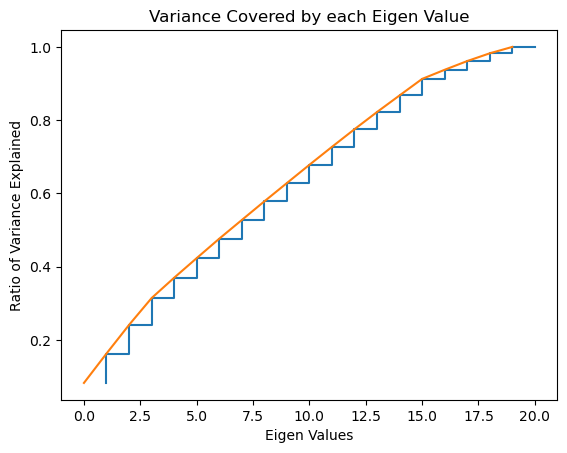

In [14]:
plt.step(list(range(1,21)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

- In this case, we select the **Eigen Value : 13** as the steps generated have significant variances and thus the other features get dominated by their variances. 

In [15]:
df_pca2 = df_pca.drop(columns = [14,15,16,17,18,19])
df_pca2

0         1         2         3         4         5         6   \
0    -1.373692  2.444628 -0.009496 -1.082728 -0.067873  1.100292 -1.046597   
1    -1.189426 -1.595518  0.519520  1.019051  0.882769 -1.111407  0.451329   
2    -0.808330 -1.050896  0.126150  1.861042  1.042121 -0.964070  0.919928   
3    -0.813734 -0.683434  1.813617  0.343982  0.157281 -0.893936  1.899443   
4     1.945071 -0.464257 -0.609127  1.742856 -1.586655 -0.846162 -0.038796   
...        ...       ...       ...       ...       ...       ...       ...   
2995  0.006307 -0.905495 -0.724554 -0.497466 -1.629128 -1.077005  0.990442   
2996 -1.303975  2.027551  1.677194  1.865074  0.707624  1.339856  0.009990   
2997 -0.194999  0.529695 -2.107668  1.378440 -1.251246  0.444810 -0.476393   
2998 -0.563338  1.330229  0.369581 -2.393391  0.510636 -0.493041 -0.269688   
2999  0.824990 -0.143253 -2.148940 -0.351659  0.829960 -0.210844 -1.210916   

            7         8         9         10        11        12        13  
0     1.833856  0.508001 -1.199337  0.341584  0.107874 -0.592675  0.603058  
1     0.103865  0.348366  1.126367  0.788908 -1.001664 -0.200032 -0.795662  
2    -0.284361  1.500441  0.655318  0.820563 -1.628571 -0.541407 -0.507364  
3     0.100499  0.173904 -1.959489  0.260717 -0.518648 -0.385562  0.114655  
4     1.013044 -0.310031  0.867611 -0.491701  0.011528 -0.007335 -1.311007  
...        ...       ...       ...       ...       ...       ...       ...  
2995  0.822914  0.357877  0.248901 -1.603400 -0.002788 -0.579466 -0.033720  
2996  0.958897  2.395894  0.452017  0.766945 -0.501018 -0.269910  0.395871  
2997 -0.316871 -1.260516 -0.572422  1.972404  0.579870 -0.201473 -0.705074  
2998  1.066071  0.027853  0.663664  0.381343 -0.267065  0.168233 -0.899343  
2999 -1.247200 -0.769426 -0.914326 -1.741450 -0.311563 -0.002345  0.136295  

[3000 rows x 14 columns]

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Hierarchical Clustering</div></center>

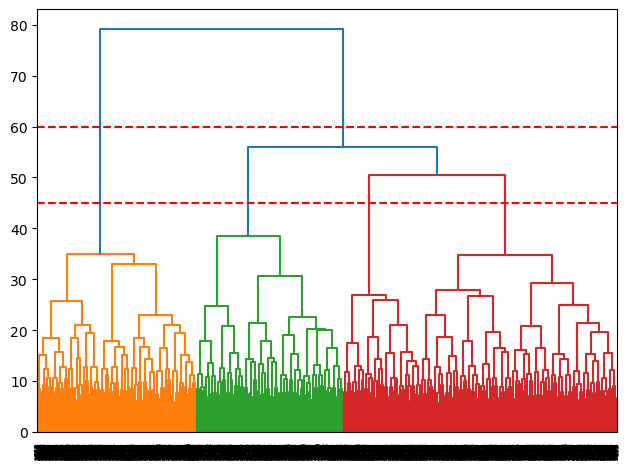

In [16]:
linkage_data = linkage(df_pca2, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.axhline(y=60, color='r', linestyle='--')
plt.axhline(y=45, color='r', linestyle='--')

- It has a possible number of clusters of **3 & 4**.

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_pca2)
df_pca2['Cluster']=y_hc
df_pca2

0         1         2         3         4         5         6  \
0    -1.373692  2.444628 -0.009496 -1.082728 -0.067873  1.100292 -1.046597   
1    -1.189426 -1.595518  0.519520  1.019051  0.882769 -1.111407  0.451329   
2    -0.808330 -1.050896  0.126150  1.861042  1.042121 -0.964070  0.919928   
3    -0.813734 -0.683434  1.813617  0.343982  0.157281 -0.893936  1.899443   
4     1.945071 -0.464257 -0.609127  1.742856 -1.586655 -0.846162 -0.038796   
...        ...       ...       ...       ...       ...       ...       ...   
2995  0.006307 -0.905495 -0.724554 -0.497466 -1.629128 -1.077005  0.990442   
2996 -1.303975  2.027551  1.677194  1.865074  0.707624  1.339856  0.009990   
2997 -0.194999  0.529695 -2.107668  1.378440 -1.251246  0.444810 -0.476393   
2998 -0.563338  1.330229  0.369581 -2.393391  0.510636 -0.493041 -0.269688   
2999  0.824990 -0.143253 -2.148940 -0.351659  0.829960 -0.210844 -1.210916   

             7         8         9        10        11        12        13  \
0     1.833856  0.508001 -1.199337  0.341584  0.107874 -0.592675  0.603058   
1     0.103865  0.348366  1.126367  0.788908 -1.001664 -0.200032 -0.795662   
2    -0.284361  1.500441  0.655318  0.820563 -1.628571 -0.541407 -0.507364   
3     0.100499  0.173904 -1.959489  0.260717 -0.518648 -0.385562  0.114655   
4     1.013044 -0.310031  0.867611 -0.491701  0.011528 -0.007335 -1.311007   
...        ...       ...       ...       ...       ...       ...       ...   
2995  0.822914  0.357877  0.248901 -1.603400 -0.002788 -0.579466 -0.033720   
2996  0.958897  2.395894  0.452017  0.766945 -0.501018 -0.269910  0.395871   
2997 -0.316871 -1.260516 -0.572422  1.972404  0.579870 -0.201473 -0.705074   
2998  1.066071  0.027853  0.663664  0.381343 -0.267065  0.168233 -0.899343   
2999 -1.247200 -0.769426 -0.914326 -1.741450 -0.311563 -0.002345  0.136295   

      Cluster  
0           1  
1           0  
2           0  
3           0  
4           3  
...       ...  
2995        0  
2996        1  
2997        3  
2998        1  
2999        2  

[3000 rows x 15 columns]

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

fig = px.scatter_3d(df_pca2,x=0,y=1,z=2,color='Cluster', color_continuous_scale= 'rainbow', title= 'Battery Power vs Blue vs Clock Speed')
fig.show()



In [19]:
from sklearn.cluster import AgglomerativeClustering
df_pca3=df_pca2.copy()
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(df_pca3)

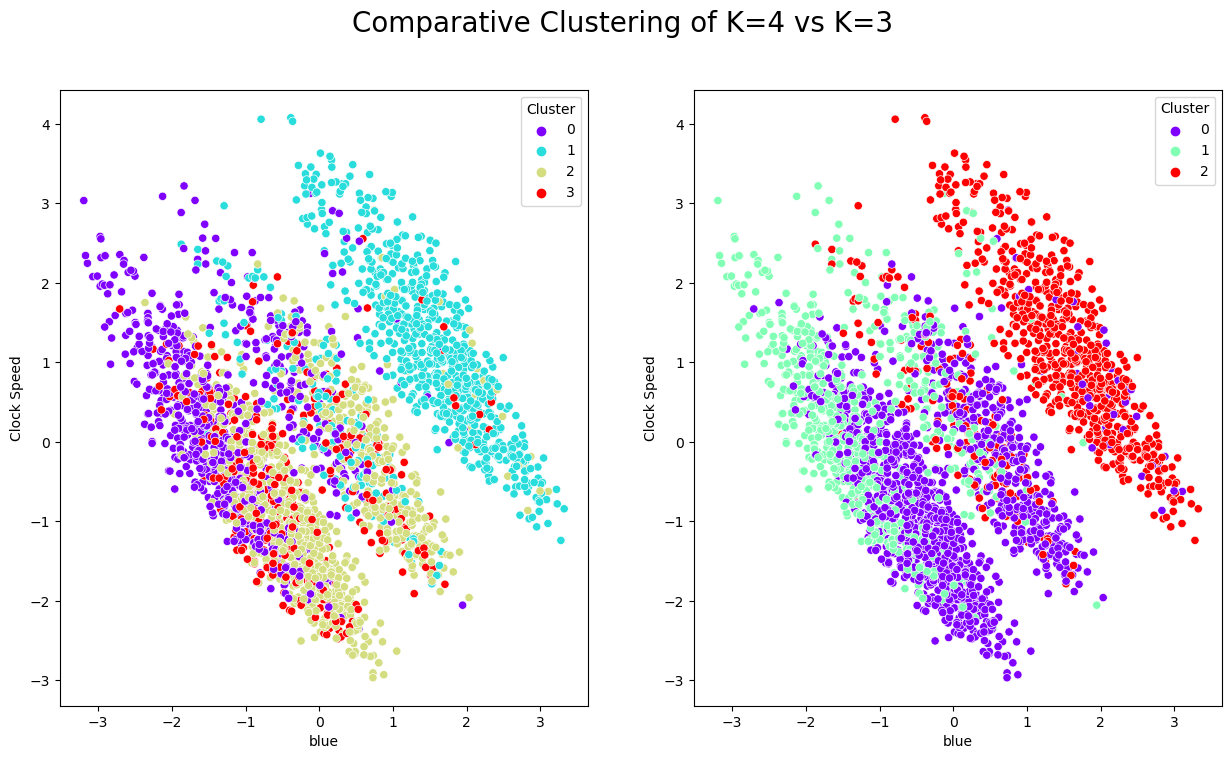

In [20]:
# df_pca2['Cluster'] = y_hc

fig, (ax1,ax2)=plt.subplots(1,2, figsize= (15,8))
plt.suptitle('Comparative Clustering of K=4 vs K=3', fontsize= 20)
sns.scatterplot(data=df_pca2,x=1,y=2,hue='Cluster',palette='rainbow',ax= ax1)
ax1.set_xlabel('blue')
ax1.set_ylabel('Clock Speed')

df_pca3['Cluster'] = y_hc1
sns.scatterplot(data=df_pca3,x=1,y=2,hue='Cluster',palette='rainbow', ax= ax2)
ax2.set_xlabel('blue')
ax2.set_ylabel('Clock Speed')

plt.show()

- In this diagram, the values of k = 3 tend to be better separated than those of k = 4.

## Hierarchical Analysis

In [21]:
hie_analysis= df.drop(df.columns[14:], axis= 1)
hie_analysis['Cluster']= df_pca2['Cluster'].values

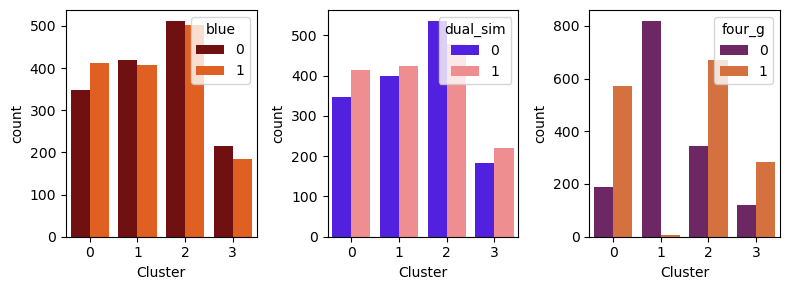

In [22]:
category= hie_analysis[['blue', 'dual_sim', 'four_g']]
category['Cluster']= hie_analysis['Cluster'].values
fig, (ax1,ax2,ax3)= plt.subplots(1,3, figsize=(8,3))
sns.countplot(x= 'Cluster',hue= 'blue',data=hie_analysis, ax= ax1, palette= 'gist_heat')
sns.countplot(x= 'Cluster',hue= 'dual_sim',data=hie_analysis, ax= ax2, palette= 'gnuplot2')
sns.countplot(x= 'Cluster',hue= 'four_g',data=hie_analysis, ax= ax3, palette= 'inferno')
plt.tight_layout()

insights:
1. In cluster 3, the lowest Bluetooth score is compared to cluster 2, which has a high number of Bluetooths.
2. In cluster 2, the number of non-dualsim is not greater than that of dualsim, and cluster 2 is the lowest.
3. Cluster 1 has more non-4G numbers, but Cluster 2 has the highest, and Cluster 3 has the lowest number of 4G.

In [23]:
hie_analysis2= hie_analysis.drop(columns= ['blue', 'dual_sim', 'four_g'])
hie_analysis2= hie_analysis2.groupby(['Cluster']).mean().reset_index()
hie_analysis2

Cluster  battery_power  clock_speed        fc  int_memory     m_dep  \
0        0    1201.036842     1.429474  3.871053   32.994737  0.521053   
1        1    1230.446602     1.595631  4.531553   33.047330  0.527063   
2        2    1288.960591     1.567094  2.684729   32.553695  0.474384   
3        3    1223.381546     1.480299  9.503741   30.912718  0.521696   

    mobile_wt   n_cores         pc   px_height     px_width          ram  
0  137.769737  4.818421   9.630263  721.260526  1302.948684  2233.356579  
1  139.071602  4.307039  10.118932  656.179612  1237.149272  2099.688107  
2  140.688670  4.362562   7.734975  574.782266  1201.661084  2085.737931  
3  144.413965  4.314214  15.907731  611.179551  1280.466334  2102.009975

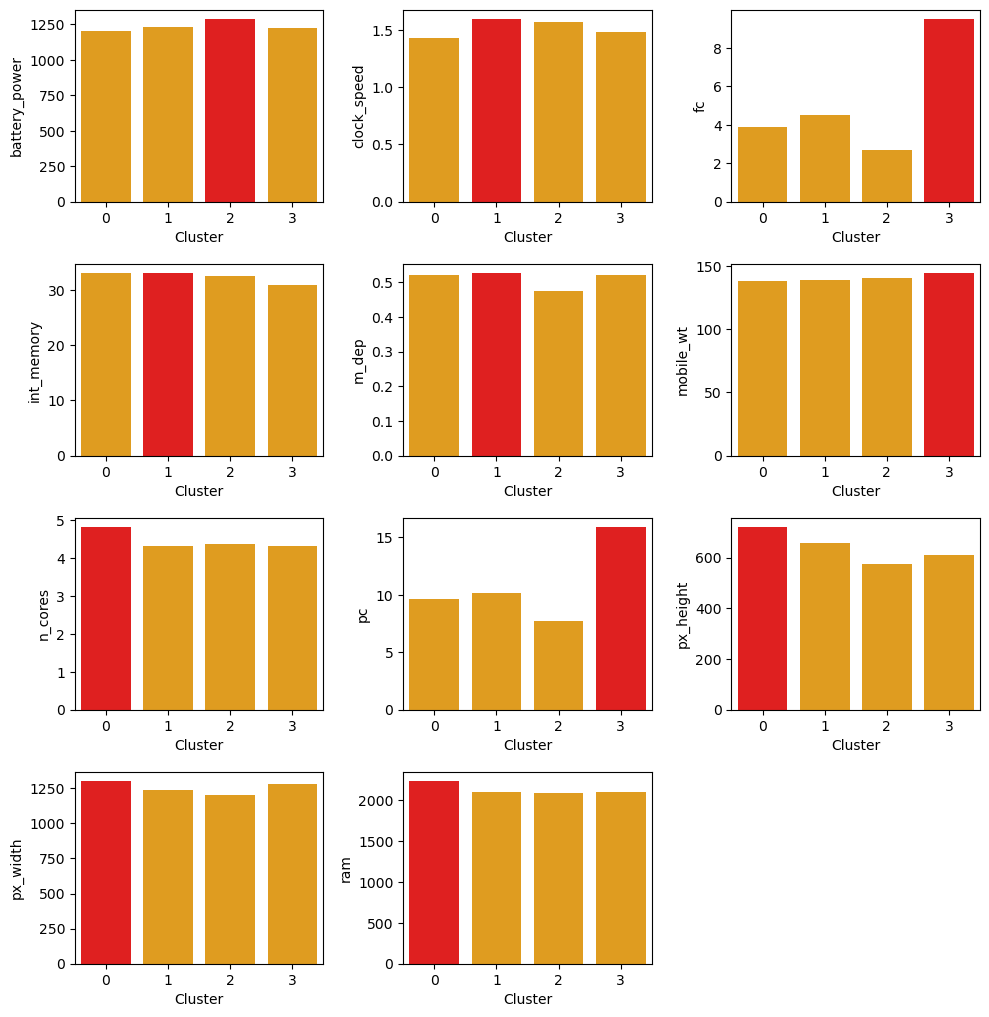

In [24]:
collist = hie_analysis2.columns
fig = plt.figure(figsize = (10,20))

for i in range(len(collist))[1:]:
    
    col = collist[i]
    group= hie_analysis2.groupby('Cluster').mean()[col]
    values= group.values
    idx= group.index
    sub = fig.add_subplot(8,3,i)
    clrs= ['orange' if (x< max(values)) else'red' for x in values]
    sns.barplot(x=idx,y=values, palette= clrs)
    plt.ylabel(col)

fig.tight_layout()
plt.show()

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">KMeans</div></center>

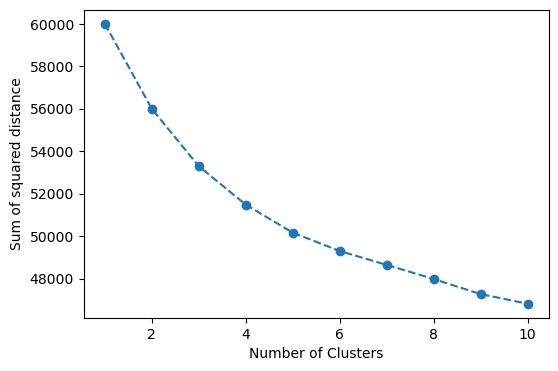

In [25]:
pca_scores = pca.transform(scale_std)

results = {}

for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_scores)   # pca_scores are standarzied by default
    results[i] = kmeans_pca.inertia_
    
    
    
plt.figure(figsize=(6, 4))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distance')
plt.show()    

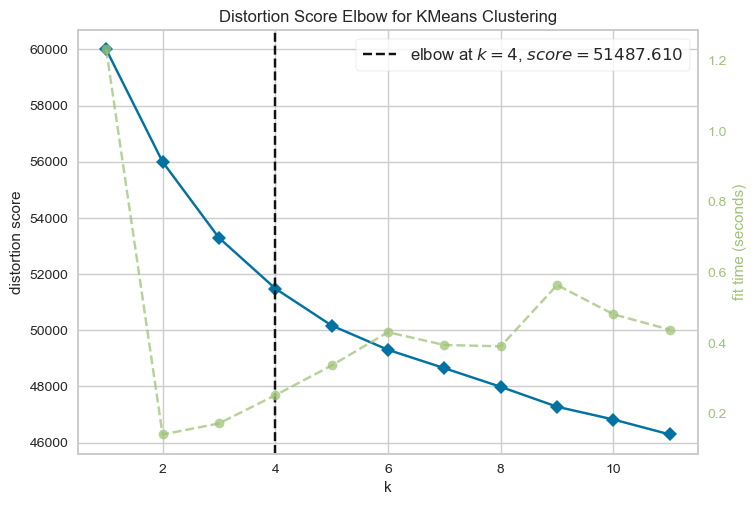

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(pca_scores)        # Fit the data to the visualizer
visualizer.show()

- From the results of the above, we select :
    - **k : Clusters = 4**

In [27]:
# mengelompokkan menjadi 4 klaster

kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

In [28]:
#Data frame keseluruhan 
df2=df.copy()
df_segm_pca = pd.concat([df.reset_index(drop=True), df_pca2], axis=1).drop('Cluster',axis=1)
df_segm_pca.columns.values[-14:] = ['component '+str(i+1) for i in range(14)]
df_segm_pca['K-means PCA'] = kmeans_pca.labels_
df_segm_pca

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
2995           1700     1          1.9         0   0       1          54   
2996            609     0          1.8         1   0       0          13   
2997           1185     0          1.4         0   1       1           8   
2998           1533     1          0.5         1   0       0          50   
2999           1270     1          0.5         0   4       1          35   

      m_dep  mobile_wt  n_cores  ...  component 6  component 7  component 8  \
0       0.6        188        2  ...     1.100292    -1.046597     1.833856   
1       0.7        136        3  ...    -1.111407     0.451329     0.103865   
2       0.9        145        5  ...    -0.964070     0.919928    -0.284361   
3       0.8        131        6  ...    -0.893936     1.899443     0.100499   
4       0.6        141        2  ...    -0.846162    -0.038796     1.013044   
...     ...        ...      ...  ...          ...          ...          ...   
2995    0.5        170        7  ...    -1.077005     0.990442     0.822914   
2996    0.9        186        4  ...     1.339856     0.009990     0.958897   
2997    0.5         80        1  ...     0.444810    -0.476393    -0.316871   
2998    0.4        171        2  ...    -0.493041    -0.269688     1.066071   
2999    0.1        140        6  ...    -0.210844    -1.210916    -1.247200   

      component 9  component 10  component 11  component 12  component 13  \
0        0.508001     -1.199337      0.341584      0.107874     -0.592675   
1        0.348366      1.126367      0.788908     -1.001664     -0.200032   
2        1.500441      0.655318      0.820563     -1.628571     -0.541407   
3        0.173904     -1.959489      0.260717     -0.518648     -0.385562   
4       -0.310031      0.867611     -0.491701      0.011528     -0.007335   
...           ...           ...           ...           ...           ...   
2995     0.357877      0.248901     -1.603400     -0.002788     -0.579466   
2996     2.395894      0.452017      0.766945     -0.501018     -0.269910   
2997    -1.260516     -0.572422      1.972404      0.579870     -0.201473   
2998     0.027853      0.663664      0.381343     -0.267065      0.168233   
2999    -0.769426     -0.914326     -1.741450     -0.311563     -0.002345   

      component 14  K-means PCA  
0         0.603058            3  
1        -0.795662            2  
2        -0.507364            1  
3         0.114655            2  
4        -1.311007            0  
...            ...          ...  
2995     -0.033720            2  
2996      0.395871            3  
2997     -0.705074            1  
2998     -0.899343            3  
2999      0.136295            0  

[3000 rows x 35 columns]

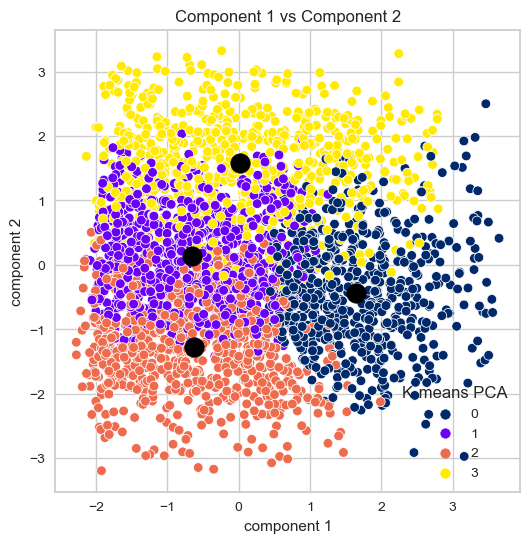

In [29]:
#Scatter plot komponen 1 dan 2 dari hasil Kmeans 

plt.figure(figsize=(6, 6))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 2'],
    hue=df_segm_pca['K-means PCA'],palette=['#00296b','#6a00f4','#ee6c4d','#ffea00'])

centers=np.array(kmeans_pca.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],color='black',s=200)

plt.title('Component 1 vs Component 2')
plt.show()

#### Comment

>- Clusters are quite good at grouping the datasets above, but there are still some overlaps. This happens because the dimensions are not suitable for showing cluster results. 

In [30]:
import plotly.express as px
fig = px.scatter_3d(df_segm_pca, x='component 1', y='component 2', z='component 3',
              color='K-means PCA',color_continuous_scale=['#00296b','#6a00f4','#ee6c4d','#ffea00'])
fig.show()

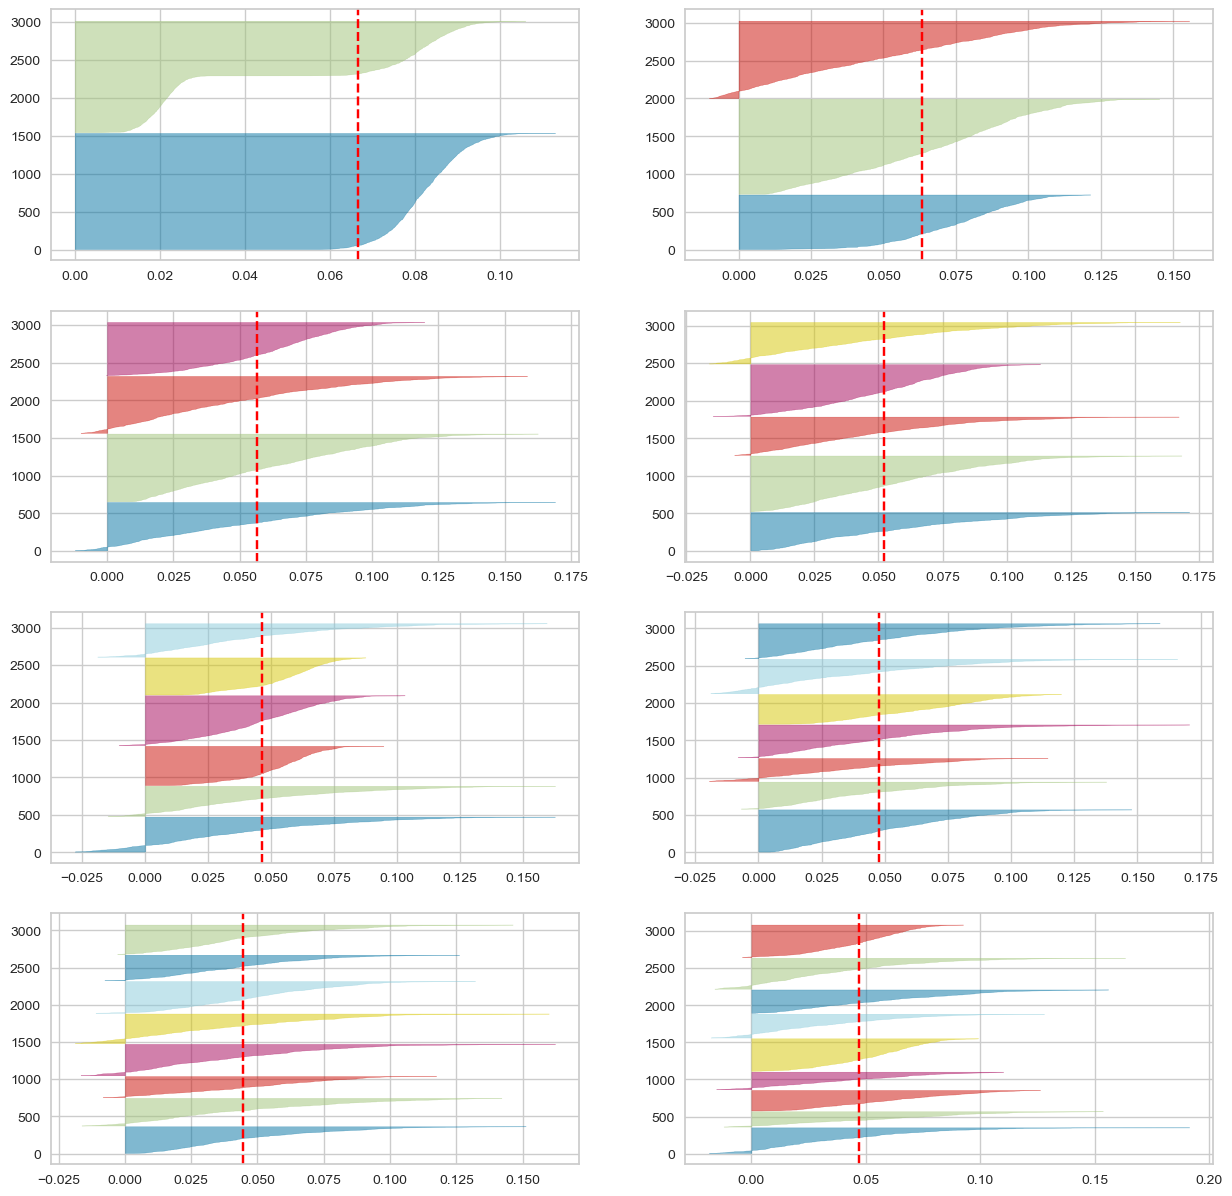

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,15))

for i in [2, 3, 4, 5, 6, 7,8,9]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(pca_scores) 

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">DBSCAN</div></center>

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

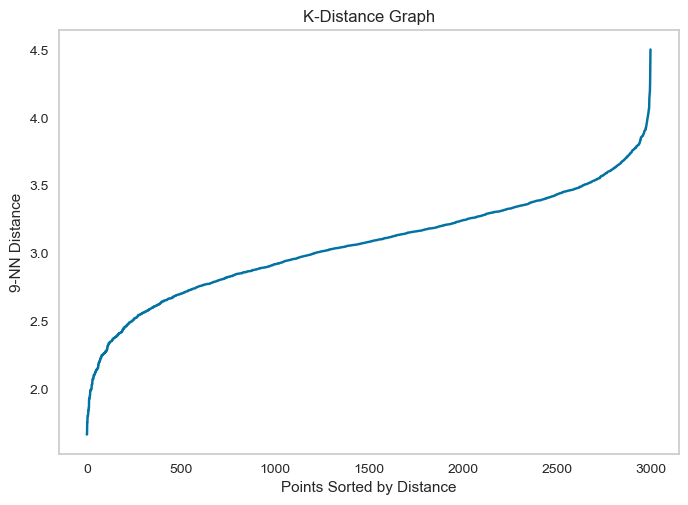

In [33]:
knn = NearestNeighbors(n_neighbors = 5)
model = knn.fit(df_scl)
distances, indices = knn.kneighbors(df_scl)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('9-NN Distance')
plt.title('K-Distance Graph');

In [34]:
db = DBSCAN(eps = 3.7, min_samples = 14).fit(df_scl)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

df_segm_pca['class'] = labels

Number of Clusters :  3
Number of Outliers :  878


In [35]:
df_segm_pca['class'].value_counts()

 0    2097
-1     878
 1      17
 2       8
Name: class, dtype: int64

In [36]:
df_analysis = df_segm_pca.groupby('K-means PCA', as_index=False).mean().round(3)
df_analysis

K-means PCA  battery_power   blue  clock_speed  dual_sim      fc  four_g  \
0            0       1265.133  0.465        1.626     0.535  10.036   0.669   
1            1       1243.961  0.506        1.508     0.496   2.029   0.635   
2            2       1234.376  0.514        1.425     0.505   2.629   0.703   
3            3       1226.014  0.518        1.576     0.520   4.210   0.000   

   int_memory  m_dep  mobile_wt  ...  component 6  component 7  component 8  \
0      30.744  0.503    140.663  ...        0.058        0.078        0.006   
1      32.462  0.513    142.427  ...       -0.004       -0.032        0.051   
2      33.942  0.494    136.681  ...       -0.024       -0.036       -0.012   
3      32.948  0.517    139.874  ...       -0.021        0.008       -0.058   

   component 9  component 10  component 11  component 12  component 13  \
0       -0.020         0.090        -0.029         0.101        -0.000   
1       -0.014        -0.037         0.014        -0.045        -0.082   
2        0.001        -0.002        -0.057         0.002         0.091   
3        0.035        -0.033         0.070        -0.036         0.008   

   component 14  class  
0         0.030 -0.290  
1        -0.012 -0.087  
2         0.004 -0.213  
3        -0.017 -0.595  

[4 rows x 36 columns]

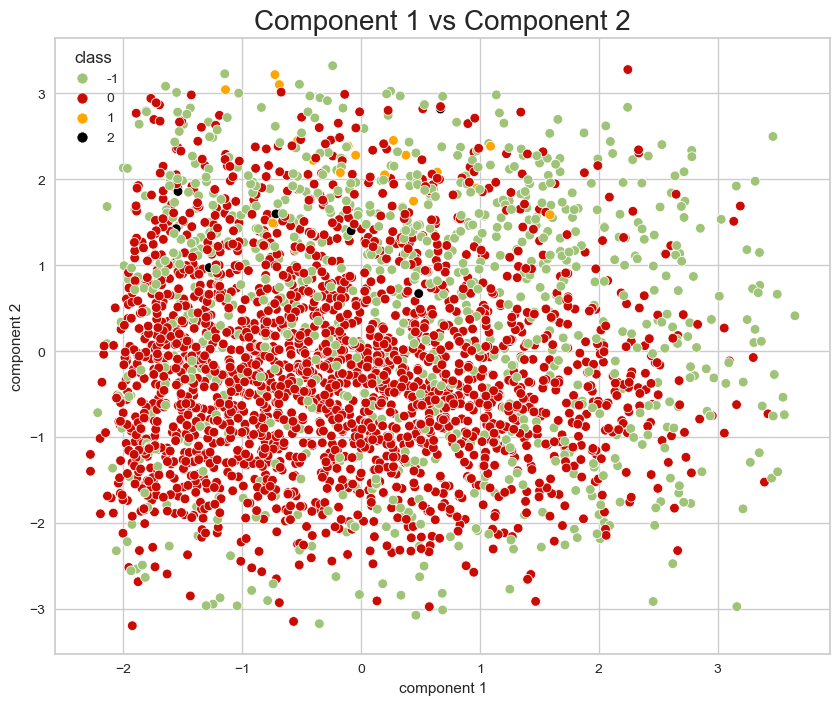

In [37]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_segm_pca['component 1'],
    y=df_segm_pca['component 2'],
    hue=df_segm_pca['class'],
    palette=['g','r','orange', 'black']
)

plt.title('Component 1 vs Component 2', fontsize=20)
plt.show()

In [38]:
import plotly.express as px
fig = px.scatter_3d(df_segm_pca, x='component 1', y='component 2', z='component 3',
              color='class')
fig.show()

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Comparing Silhouette Score by Entire Method</div></center>

In [39]:
metode_kmeans= silhouette_score(pca_scores, kmeans_pca.labels_)
metode_hirarki=silhouette_score(pca_scores, y_hc)
metode_dbscan= silhouette_score(pca_scores, labels)


metode=['metode kmeans','metode hirarki', 'metode dbscan']
silhouette=[metode_kmeans,metode_hirarki,metode_dbscan]
dict = {'metode': metode, 
                'silhouette_score':silhouette} 

data_frame=pd.DataFrame(dict).sort_values(by='silhouette_score', ascending=False).reset_index().drop('index',axis=1)
data_frame['silhouette_score'] = data_frame['silhouette_score'].round(decimals = 3)
data_frame

metode  silhouette_score
0   metode kmeans             0.057
1  metode hirarki             0.030
2   metode dbscan            -0.030

[Text(0, 0, '0.057'), Text(0, 0, '0.03'), Text(0, 0, '-0.03')]

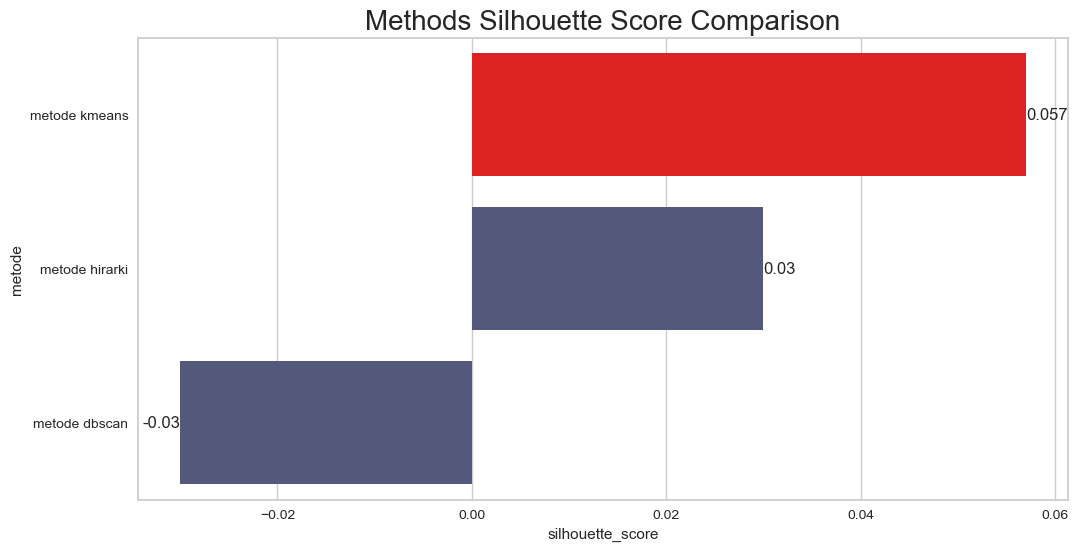

In [40]:
colors = ['#fc0303', '#4d5482', '#4d5482']
plt.figure(figsize=(12,6))
ax = sns.barplot(y='metode', x='silhouette_score',
                 data=data_frame,
                 errwidth=0,
                 orient = 'h',
                 palette = colors)
plt.title('Methods Silhouette Score Comparison', fontsize=20)
ax.bar_label(ax.containers[0])


# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Models DBI Score Comparison</div></center>

In [41]:
from sklearn.metrics import davies_bouldin_score
metode_kmeans= davies_bouldin_score(pca_scores, kmeans_pca.labels_)
metode_hirarki = davies_bouldin_score(pca_scores, y_hc)
metode_dbscan= davies_bouldin_score(pca_scores, labels)


metode=['metode kmeans','metode hirarki', 'metode dbscan']
DBI=[metode_kmeans,metode_hirarki,metode_dbscan]
dict = {'metode': metode, 
                'DBI_score':DBI} 

data_frame=pd.DataFrame(dict).sort_values(by='DBI_score').reset_index().drop('index',axis=1)
data_frame['DBI_score'] = data_frame['DBI_score'].round(decimals = 3)
data_frame

metode  DBI_score
0   metode kmeans      3.321
1  metode hirarki      4.056
2   metode dbscan      4.099

[Text(0, 0, '3.321'), Text(0, 0, '4.056'), Text(0, 0, '4.099')]

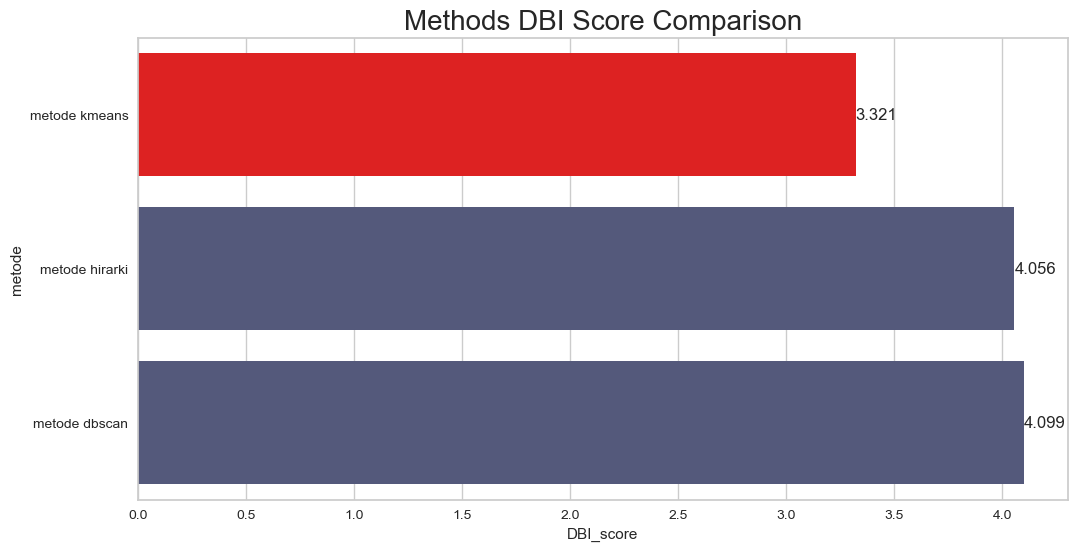

In [42]:
colors = ['#fc0303', '#4d5482', '#4d5482']
plt.figure(figsize=(12,6))
ax = sns.barplot(y='metode', x='DBI_score',
                 data=data_frame,
                 errwidth=0,
                 orient = 'h',
                 palette = colors)

plt.title('Methods DBI Score Comparison', fontsize=20)
ax.bar_label(ax.containers[0])


 - Based on the analysis carried out, obtained the best number of models with a Davies-Bouldin Index value is 3.321 with K-Means method

In [43]:
df2['K-means PCA'] = kmeans_pca.labels_
df2

group=df2.groupby('K-means PCA').mean()
group.style.highlight_max(color = 'yellow', axis = 0)
# group.style.highlight_min(color = 'lightgreen', axis = 0)

In [44]:
group_std = pd.DataFrame(scaler.fit_transform(group), columns=group.columns)
group_std

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0       1.559525 -1.690535     1.218364  1.415805  1.676392  0.575888   
1       0.108942  0.230031    -0.336340 -1.210595 -0.851442  0.457149   
2      -0.547770  0.623849    -1.444377 -0.607035 -0.661960  0.692983   
3      -1.120697  0.836655     0.562353  0.401825 -0.162989 -1.726019   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.537319 -0.381918   0.361277 -0.538491  1.665594  -0.165835 -0.359832   
1   -0.053349  0.694599   1.208532 -0.992706 -0.896970  -1.375146 -1.096129   
2    1.224690 -1.445291  -1.551970  1.646586 -0.635159   1.439131  1.624951   
3    0.365978  1.132610  -0.017838 -0.115389 -0.133465   0.101851 -0.168990   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  0.267200 -0.220393 -0.354377  -1.462125  0.547850      1.546752 -0.272381  
1 -0.837341 -1.255336 -1.129072   0.091864  0.595040     -0.010184 -1.278010  
2  1.522999  1.539946  1.607549   0.008764  0.588876     -1.230308  1.513654  
3 -0.952858 -0.064217 -0.124099   1.361497 -1.731766     -0.306260  0.036736

In [45]:
group_std.rename(index = {
    0: 'High-End',
    1: 'Middle-Range',
    2: 'Middle-Range to High',
    3: 'Low End'
}, inplace=True)
group_std.index.name = 'cluster'
group_std.reset_index()
group_std

battery_power      blue  clock_speed  dual_sim  \
cluster                                                                
High-End                   1.559525 -1.690535     1.218364  1.415805   
Middle-Range               0.108942  0.230031    -0.336340 -1.210595   
Middle-Range to High      -0.547770  0.623849    -1.444377 -0.607035   
Low End                   -1.120697  0.836655     0.562353  0.401825   

                            fc    four_g  int_memory     m_dep  mobile_wt  \
cluster                                                                     
High-End              1.676392  0.575888   -1.537319 -0.381918   0.361277   
Middle-Range         -0.851442  0.457149   -0.053349  0.694599   1.208532   
Middle-Range to High -0.661960  0.692983    1.224690 -1.445291  -1.551970   
Low End              -0.162989 -1.726019    0.365978  1.132610  -0.017838   

                       n_cores        pc  px_height  px_width       ram  \
cluster                                                                   
High-End             -0.538491  1.665594  -0.165835 -0.359832  0.267200   
Middle-Range         -0.992706 -0.896970  -1.375146 -1.096129 -0.837341   
Middle-Range to High  1.646586 -0.635159   1.439131  1.624951  1.522999   
Low End              -0.115389 -0.133465   0.101851 -0.168990 -0.952858   

                          sc_h      sc_w  talk_time   three_g  touch_screen  \
cluster                                                                       
High-End             -0.220393 -0.354377  -1.462125  0.547850      1.546752   
Middle-Range         -1.255336 -1.129072   0.091864  0.595040     -0.010184   
Middle-Range to High  1.539946  1.607549   0.008764  0.588876     -1.230308   
Low End              -0.064217 -0.124099   1.361497 -1.731766     -0.306260   

                          wifi  
cluster                         
High-End             -0.272381  
Middle-Range         -1.278010  
Middle-Range to High  1.513654  
Low End               0.036736

In [46]:
group_std = group_std.reset_index()

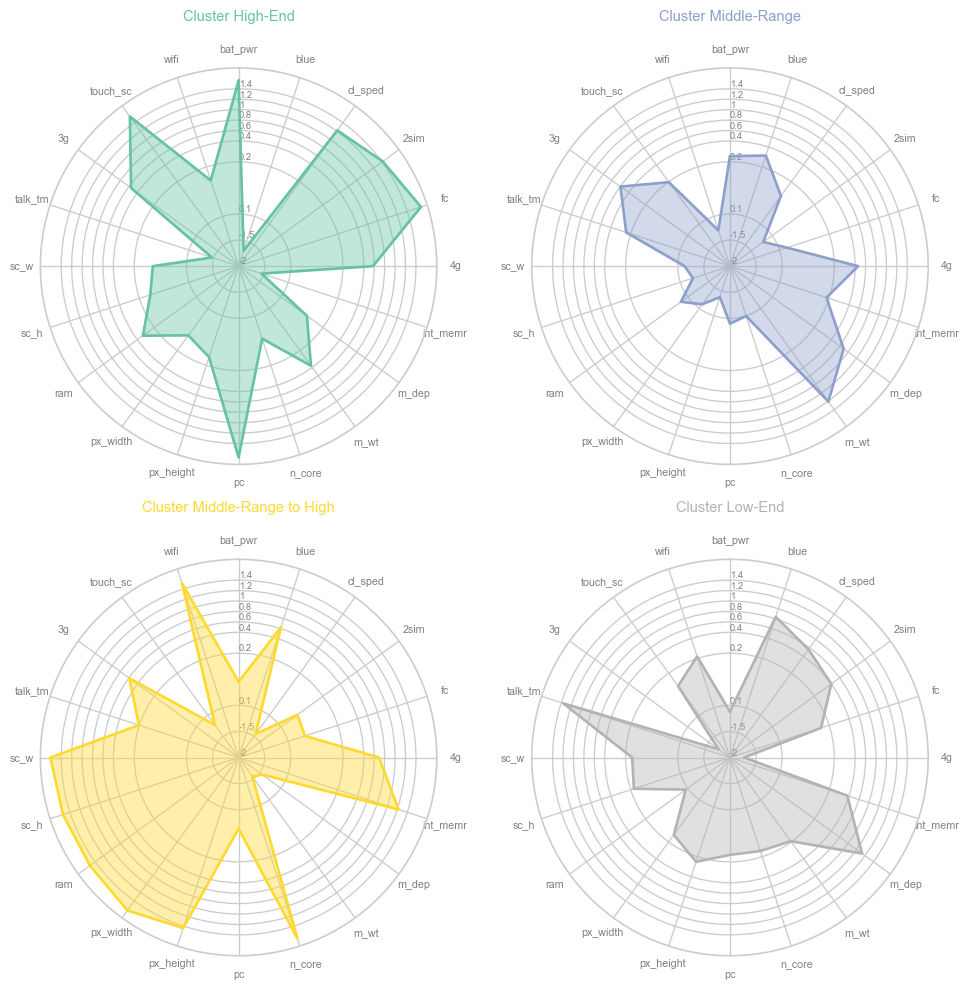

In [47]:
from math import pi
 
# Set data
df9 = pd.DataFrame({
'group': ['High-End','Middle-Range','Middle-Range to High','Low-End'],
'bat_pwr': [1.559525, 0.108942, -0.54777, -1.120697],
'blue': [-1.690535, 0.230031, 0.623849, 0.836655],
'cl_sped': [1.218364, -0.33634, -1.444377, 0.562353],
'2sim': [1.415805, -1.210595, -0.607035, 0.401825],
'fc': [1.676392, -0.851442, -0.66196, -0.162989],
'4g': [0.575888, 0.457149, 0.692983, -1.726019],
'int_memr': [-1.537319, -0.053349, 1.22469, 0.365978],
'm_dep': [-0.381918, 0.694599, -1.445291, 1.13261],
'm_wt': [0.361277, 1.208532, -1.55197, -0.017838],
'n_core': [-0.538491, -0.992706, 1.646586, -0.115389],
'pc': [1.665594, -0.89697, -0.635159, -0.133465],
'px_height': [-0.165835, -1.375146, 1.439131, 0.101851],
'px_width': [-0.359832, -1.096129, 1.624951, -0.16899],
'ram': [0.2672, -0.837341, 1.522999, -0.952858],
'sc_h' : [-0.220393, -1.255336, 1.539946, -0.064217],
'sc_w': [-0.354377, -1.129072, 1.607549, -0.12409],
'talk_tm': [-1.462125, 0.091864, 0.008764, 1.361497],
'3g': [0.54785, 0.59504, 0.588876, -1.731766],
'touch_sc': [1.546752, -0.010184, -1.230308, -0.30626],
'wifi': [-0.272381, -1.27801, 1.513654, 0.036736]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(df9)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-2, -1.5, -1, 0 , 0.4, 0.6, 0.8, 1, 1.2, 1.4], ['-2', '-1.5', '0.1', '0.2', '0.4', '0.6', '0.8', '1', '1.2', '1.4'], color="grey", size=7)
    plt.ylim(-2, 1.8)

    # Ind1
    values=df9.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df9.index))
 
# Loop to plot
for row in range(0, len(df9.index)):
    make_spider( row=row, title='Cluster '+df9['group'][row], color=my_palette(row))
    
plt.tight_layout()

## Insight


>Cluster 0 (High-End) has the characteristics of the highest battery power, clock speed, front camera, and primary camera; this cluster is included in the type of cellphone that is suitable for taking pictures and making videos.

Assumption: Simply put, these products have HP quality in the high-end range, and the company tries to produce products that are in great demand among the public, especially photo quality and good battery power.
>- Cluster 1 (Middle-Range) has the characteristics of the highest weight mobile phone, a low-core processor (lowest fc and pc), low RAM, and supports 3G and 4G with standard battery capacity.

Assumption: The company produces this for consumers who want to experience 3G and 4G cellphones but have a pretty good battery capacity. so that consumers will consider buying these products even with a low processor speed.
>- Cluster 2 (Middle-Range to High) has int memory, pixel resolution height, pixel resolution width, ram, screen height, highest screen width, compact form (lightweight), and standard megapixel quality. lowest microprocessor speed.

Assumption: High internal memory (high RAM) is a business strategy so that this cellphone is still in demand by the public even though the microprocessor speed is reduced. Because basically this type of cellphone is suitable for work because it makes it easier for employers during meetings.
>- Cluster 3 (the "Low-End') has the highest mobile depth and talk time; this cluster is included in the old cellphone type because it doesn't yet support 4G and 3G, and also because the average thickness of this cellphone is high.

Assumption: Although many features have been trimmed in this type of cellphone, the company has a strategy to keep it in demand, namely by segmenting this product for people who do not need internet access as the main feature and who can use it to communicate even though the battery capacity is small. (Older people tend not to care about the quality of mobile phones.)

# <center><div style="font-family: Trebuchet MS; background-color: #97DEFF; color: #2D2926; padding: 12px; line-height: 1;">Conclusion</div></center>

1. In this cellphone dataset, we chose a silhouette score of **0.057** from the KMean method, with a **k value of 4**.
2. The results of the interpretation of the cluster categories are **Low-End, Middle Range, Middle to High Range, and High-End**.

Suggestions:
1. Companies must be more specific in segmenting based on consumer desires and considering cellphone innovation for the future so that the business remains sustainable.